In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data=pd.read_csv("/kaggle/input/socialmediausage-and-mentalhealth/generated_data.csv")

data.head()

,UserID,Name,Gender,DOB,Interests,City,Country,TSSM,Mental_State
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,2,6.000404
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,9,6.194838
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,8,6.866678
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,2,5.018210
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela,4,6.500349


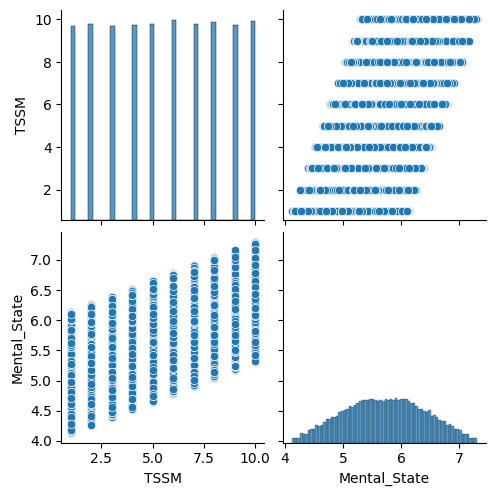

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['TSSM','Gender','Mental_State']])

> **Preprocessing**

In [4]:
from sklearn.preprocessing import LabelEncoder

#Checking for missing values
print(data.isnull().sum())

# Handling missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Normalizing 'TSSM'(Time Spent on Social Media) column between 0 and 1
data['TSSM_normalized'] = (data['TSSM'] - data['TSSM'].min()) / (data['TSSM'].max() - data['TSSM'].min())

# Binning 'Mental_State' into categories
bins = [0, 5, 7, 10]  # Defining bin boundaries
labels = ['Low', 'Moderate', 'High']  # Defining labels for each bin
data['Mental_State_Category'] = pd.cut(data['Mental_State'], bins=bins, labels=labels)

# Converting categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['City','Country'])

#Using LabelEncoder instead for Gender
label_encoder = LabelEncoder()
data_encoded['Encoded_Gender'] = label_encoder.fit_transform(data['Gender'])
data_encoded=data_encoded.drop("Gender", axis=1)

data_encoded.head()

UserID          0
Name            0
Gender          0
DOB             0
Interests       0
City            0
Country         0
TSSM            0
Mental_State    0
dtype: int64


,UserID,Name,DOB,Interests,TSSM,Mental_State,TSSM_normalized,Mental_State_Category,City_'Ali Sabieh,City_'s-Gravenzande,...,Country_Vanuatu,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Encoded_Gender
0,1,Jesse Lawhorn,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",2,6.000404,0.111111,Moderate,False,False,...,False,False,False,False,False,False,False,False,False,0
1,2,Stacy Payne,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",9,6.194838,0.888889,Moderate,False,False,...,False,False,False,False,False,False,False,False,False,0
2,3,Katrina Nicewander,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",8,6.866678,0.777778,Moderate,False,False,...,False,False,False,False,False,False,False,False,False,0
3,4,Eric Yarbrough,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",2,5.018210,0.111111,Moderate,False,False,...,False,False,False,False,False,False,False,False,False,1
4,5,Daniel Adkins,1955-09-18,"'Politics', 'History'",4,6.500349,0.333333,Moderate,False,False,...,False,False,True,False,False,False,False,False,False,0


In [5]:
#Converting to DOB DateTime
data_encoded['DOB']=pd.to_datetime(data_encoded['DOB'])
#Adding Age column
current_year=2023
data_encoded['Age']=current_year-data_encoded['DOB'].dt.year


In [6]:
data_encoded.head()

,UserID,Name,DOB,Interests,TSSM,Mental_State,TSSM_normalized,Mental_State_Category,City_'Ali Sabieh,City_'s-Gravenzande,...,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Encoded_Gender,Age
0,1,Jesse Lawhorn,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",2,6.000404,0.111111,Moderate,False,False,...,False,False,False,False,False,False,False,False,0,65
1,2,Stacy Payne,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",9,6.194838,0.888889,Moderate,False,False,...,False,False,False,False,False,False,False,False,0,19
2,3,Katrina Nicewander,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",8,6.866678,0.777778,Moderate,False,False,...,False,False,False,False,False,False,False,False,0,23
3,4,Eric Yarbrough,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",2,5.018210,0.111111,Moderate,False,False,...,False,False,False,False,False,False,False,False,1,38
4,5,Daniel Adkins,1955-09-18,"'Politics', 'History'",4,6.500349,0.333333,Moderate,False,False,...,False,True,False,False,False,False,False,False,0,68


> **Univariate Analysis**

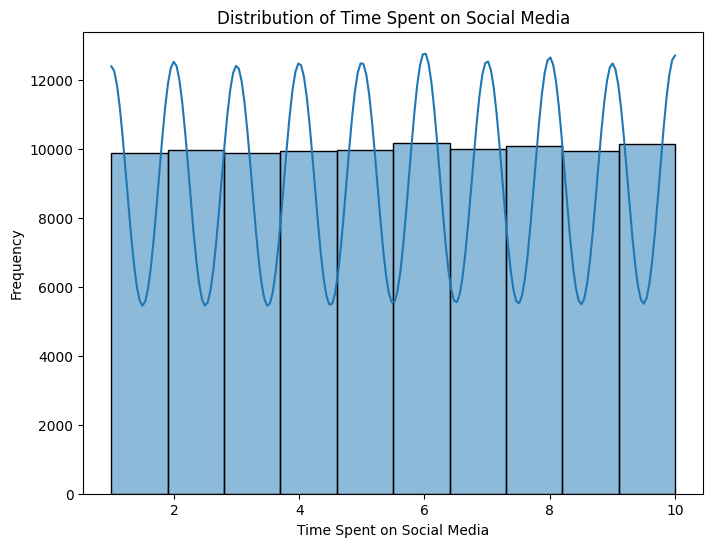

In [7]:
# Histogram with KDE (Kernel Density Estimation) for Time Spent on Social Media (TSM)
plt.figure(figsize=(8, 6))
sns.histplot(data['TSSM'], bins=10, kde=True)
plt.title('Distribution of Time Spent on Social Media')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Frequency')
plt.show()

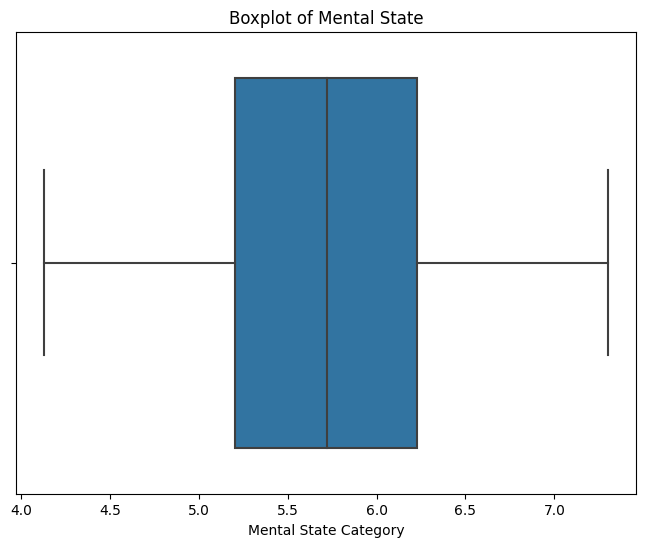

In [8]:
# Boxplot for Mental State
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Mental_State'])
plt.title('Boxplot of Mental State')
plt.xlabel('Mental State Category')
plt.show()

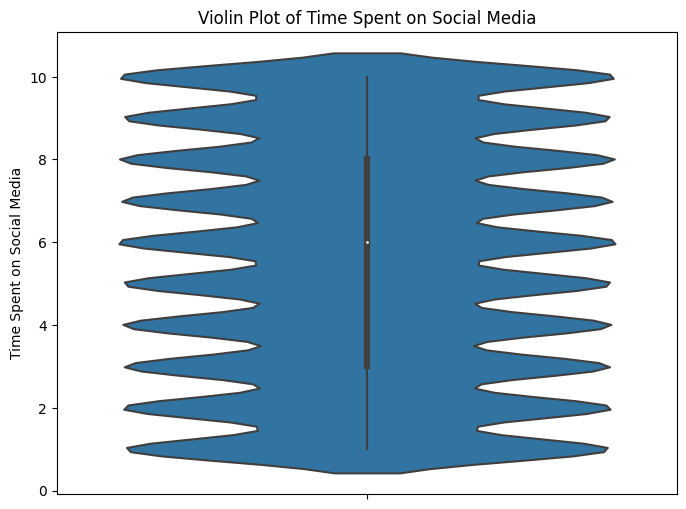

In [9]:
# Violin plot for Time Spent on Social Media
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['TSSM'])
plt.title('Violin Plot of Time Spent on Social Media')
plt.ylabel('Time Spent on Social Media')
plt.show()

> **BiVariate Analysis**

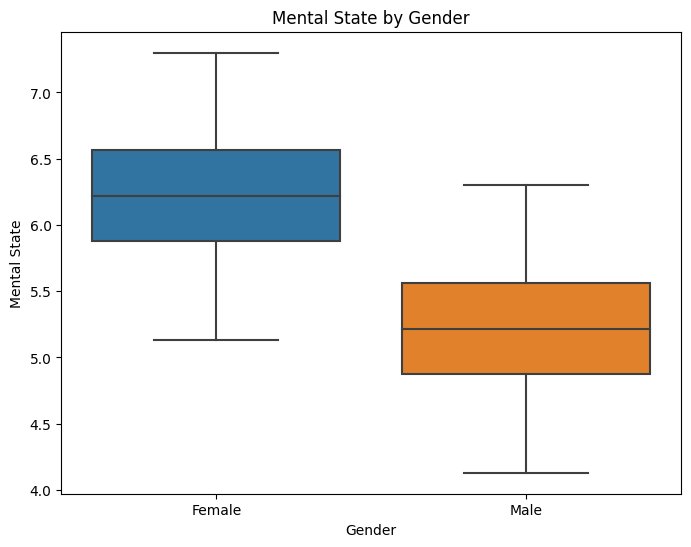

In [10]:
# Boxplot of Mental State by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Mental_State', data=data)
plt.title('Mental State by Gender')
plt.xlabel('Gender')
plt.ylabel('Mental State')
plt.show()

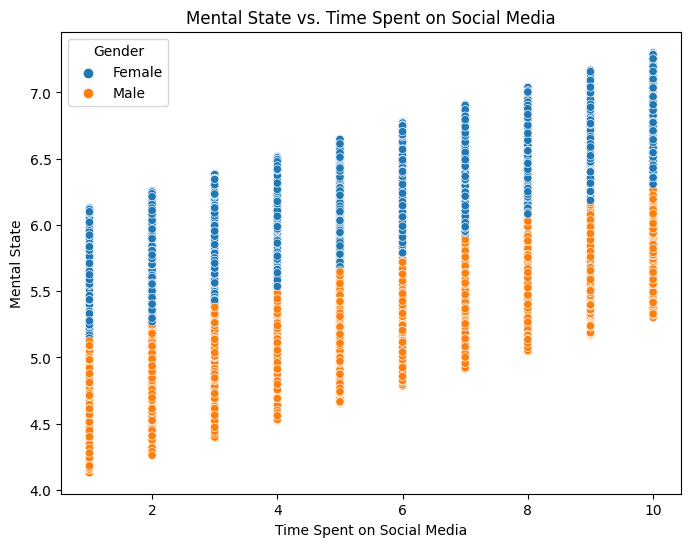

In [11]:
# Scatter plot of Mental State vs. Time Spent on Social Media
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSSM', y='Mental_State', data=data, hue='Gender')
plt.title('Mental State vs. Time Spent on Social Media')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Mental State')
plt.show()

> **Multivariate Analysis**

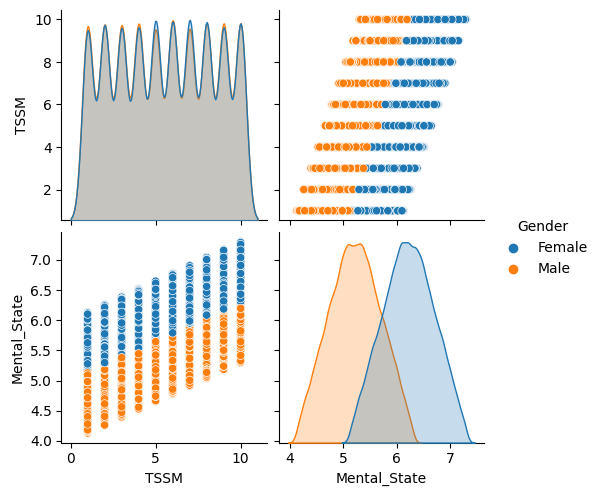

In [12]:
# Pairplot for multivariate relationships
sns.pairplot(data[['TSSM', 'Mental_State', 'Gender', 'Interests']], hue='Gender')
plt.show()

> **Feature Engineering**

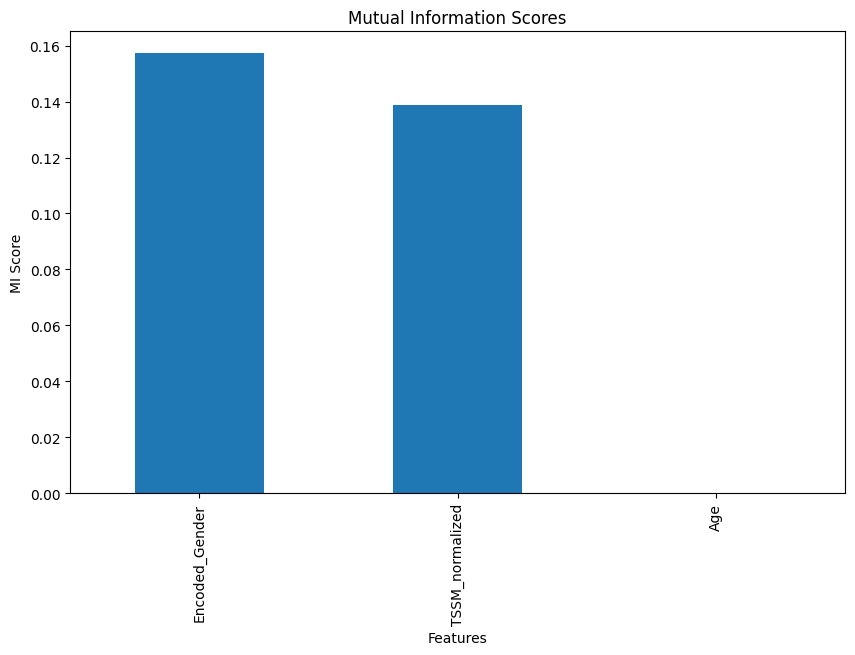

In [13]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target variable for MI calculation
X = data_encoded[['Age', 'Encoded_Gender', 'TSSM_normalized']]
y = data_encoded['Mental_State_Category']

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Plot MI scores
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

In [14]:
X=X.drop('Age',axis=1)
X.head()

,Encoded_Gender,TSSM_normalized
0,0,0.111111
1,0,0.888889
2,0,0.777778
3,1,0.111111
4,0,0.333333


> **Chosen Model--After Selection**

In [17]:
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding the target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

trained_model=xgb.XGBClassifier(learning_rate=0.1, n_estimators=100)
trained_model.fit(X_train, y_train_encoded)

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(trained_model, file)

> **Model Selection**

In [16]:
""""
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding the target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# Hyperparameters for tuning
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]}
}

# Model selection using cross-validation and hyperparameter tuning
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")
""""

SyntaxError: unterminated string literal (detected at line 50) (794490312.py, line 50)